## Group 25 
### Olof Sjögren, ??
### Romain Theodet, ??

# Question 1: Preprocessing

In [1]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# We want to "resize" the pixels value from [0..255] to [0..1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Define model ##
model = Sequential()

# 5 layers:
model.add(Flatten())
model.add(Dense(125, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
               metrics=["accuracy"])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.8443 - accuracy: 0.7488 - val_loss: 0.2091 - val_accuracy: 0.9376
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1999 - accuracy: 0.9410 - val_loss: 0.1742 - val_accuracy: 0.9446
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1418 - accuracy: 0.9585 - val_loss: 0.1320 - val_accuracy: 0.9554
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1100 - accuracy: 0.9662 - val_loss: 0.1048 - val_accuracy: 0.9662
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.1095 - val_accuracy: 0.9642
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0732 - accuracy: 0.9780 - val_loss: 0.0887 - val_accuracy: 0.9717
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0619 - 

## Q1

From the documentation we get the structure of the result from `load_data()`: \
`x_train`: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255. \
`y_train`: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data. \
`x_test`: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255. \
`y_test`: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

If the data format is "channel_first", it means that the data has a size 1x28x28: 
number of channels (3 for RGB, 1 for grayscale here), number of rows, number of columns.
Otherwise, the data has a size 28x28x1: number of rows, number of columns, number of channels.

We need to reshape the data as currently the "last" dimension contains all the pixel data next to each other. This is done in the if-else statement.
If the image was in RGB, the input dataset shape would be (60000, 28, 28*3) = (60000, 28, 84),
which is definitely not what we want. Instead, we would like (60000, 28, 28, 3), again for RGB only.

Now we cast the values to floats and divide by 255 to resize the pixel values from `[0 .. 255]` to `[0 .. 1]` getting our grayscale.
Finally we convert the vector of integers the pictures denote to a matrix of binary vectors, with a one at the corresponding index and 0 elsewhere in each vector.

## Q2.A


*  How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? 

    * The model has 5 layers:
        - `Flatten`, which will output a 1 dimensional matrix, and counts for 28\*28 = 784 neuron. *(Input layer)*
            - This layer is appropriate as it simplify the next layers, since they can work on a 1-dimensional vector.
        - `Dense` with a ReLU activation function and 125 neurons.
            - ReLU is used instead of the sigmoid or tanh because it is fast and efficient, optimizing the gradient descent.
        - `Dense` with a ReLU activation function and 100 neurons.
            - Same reasons as above.
        - `Dense` with a ReLU activation function and 50 neurons.
            - Same reasons as above.
        - `Dense` again with a Softmax activation and 10 neurons, one for each output from 0 to 9. *(Output layer)*
            - Softmax function is appropriate since it will normalize the output, resulting in different probabilities for each output.

*  What is the total number of parameters for the network? 
    * The parameters of the network are the weights and biases.
        The first layer has `28*28=784` neurons and each of these have a connection to each neuron in the next layer
        resulting in 784\*125 weights. Each neuron in the next layer is also connected to each neuron in the layer after that,
        this is true for each of the layers except the last layer which isn't connected to anything.
        Also, each neuron has a bias which is a parameter. So, the total number of parameters for the nerual network is: \
        `(784*125 + 125*100 + 100*50 + 50*10) + (125 + 100 + 50 + 10) = 116 285` parameters

*  Why does the input and output layers have the dimensions they have? 
    * The input layer has 784 neurons, one for each pixel of the 28\*28\*1 matrix since its role is to flatten our multi-dimensional matrix,
        and the output layer has a dimension of 10 as it needs to classify the images with 10 labels,
        the numbers between 0 and 9.  


## Q2.B
* What loss-function is used to train the network? 
    * The loss function used is categorical crossentropy, which is an optimization function used in case of training a classification model.
        This function classifies the data by predicting the probability of whether the data belongs to one class or the other class.

* What is the functional form (mathematical expression) of the loss function? and how should we interpret it? 
    * The mathematical expression is the following one: \
           loss = - \sum_{i=1}^{10} y_i \cdot log(\hat{y}_i)  \
        where  y_i  is the probability of the *i:th* result and hat{y}_i is the binary vector indicating the correct result. \
        hat{y}_i  will only be 1 for one index in the  hat{y}  vector, and 0 for every other number. Thus the loss will only be affected by the prediction corresponding to the actual number it represents as all other prediction will be multiplied by 0. This is the only loss which matters and should be minimized. By using log, accurate predicitions result in a lower loss and vice versa.

* Why is it appropriate for the problem at hand? 
    * The categorical cross-entropy is used here because it is a multi-class classification model. There is only one correct option (represented by a 1 in the vector) and all other options are incorrect (represented by a 0). The options are the different numbers the image represents. It also pairs well with Softmax as it guarantees positive values which is required for the log-function.


## Q2.C

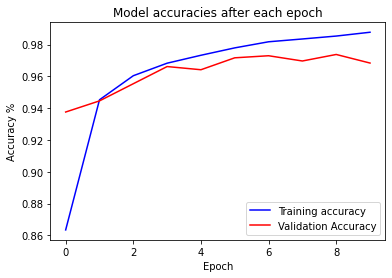

In [2]:
import matplotlib.pyplot as plt

plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Model accuracies after each epoch")
plt.plot(fit_info.epoch, fit_info.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fit_info.epoch, fit_info.history["val_accuracy"], color="red", label="Validation Accuracy")
plt.legend()
plt.show()


## Q2.D

In [3]:
## Define model ##
model = Sequential()

# Layers:
model.add(Flatten())
model.add(Dense(500, activation = "relu"))
model.add(Dense(300, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
               metrics=["accuracy"])

epochs = 40

fit_info_q2d = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


Epoch 1/40
469/469 [==============================] - 9s 19ms/step - loss: 0.6919 - accuracy: 0.8170 - val_loss: 0.2161 - val_accuracy: 0.9372
Epoch 2/40
469/469 [==============================] - 9s 19ms/step - loss: 0.2026 - accuracy: 0.9410 - val_loss: 0.1554 - val_accuracy: 0.9523
Epoch 3/40
469/469 [==============================] - 9s 18ms/step - loss: 0.1447 - accuracy: 0.9594 - val_loss: 0.1205 - val_accuracy: 0.9641
Epoch 4/40
469/469 [==============================] - 9s 18ms/step - loss: 0.1112 - accuracy: 0.9682 - val_loss: 0.1215 - val_accuracy: 0.9640
Epoch 5/40
469/469 [==============================] - 8s 18ms/step - loss: 0.0920 - accuracy: 0.9732 - val_loss: 0.0949 - val_accuracy: 0.9704
Epoch 6/40
469/469 [==============================] - 9s 18ms/step - loss: 0.0741 - accuracy: 0.9796 - val_loss: 0.0908 - val_accuracy: 0.9722
Epoch 7/40
469/469 [==============================] - 9s 18ms/step - loss: 0.0622 - accuracy: 0.9824 - val_loss: 0.0790 - val_accuracy: 0.9769

Now we plot the accuracies during the different epochs.

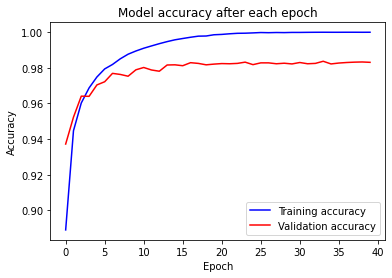

In [4]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy after each epoch")
plt.plot(fit_info_q2d.epoch, fit_info_q2d.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fit_info_q2d.epoch, fit_info_q2d.history["val_accuracy"], color="red", label="Validation accuracy")
plt.legend()
plt.show()


The best accuracy we got is 0.9821. We can clearly see the training accuracy increasing with some decline towwards the end. Although, it does so without increasing validation accuracy after some epochs.

In [5]:
from tensorflow.keras import regularizers

results_q2d = []

for factor in (1e-6, 1e-5, 5e-5 ,1e-4, 1e-3):
#for factor in (1e-6, ):
    for i in range(3):
        ## Define model ##
        model = Sequential()

        # Layers:
        model.add(Flatten())
        model.add(Dense(500, activation = "relu", kernel_regularizer=regularizers.l2(l2=factor)))
        model.add(Dense(300, activation = "relu", kernel_regularizer=regularizers.l2(l2=factor)))
        model.add(Dense(num_classes, activation="softmax"))

        model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.SGD(lr = 0.1),
                    metrics=["accuracy"])

        epochs = 15

        fit_info_tmp = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)

        results_q2d.append([factor, i, fit_info_tmp, score])


Epoch 1/15
469/469 [==============================] - 10s 20ms/step - loss: 0.6975 - accuracy: 0.8165 - val_loss: 0.2197 - val_accuracy: 0.9388
Epoch 2/15
469/469 [==============================] - 9s 20ms/step - loss: 0.2054 - accuracy: 0.9405 - val_loss: 0.1605 - val_accuracy: 0.9526
Epoch 3/15
469/469 [==============================] - 9s 20ms/step - loss: 0.1475 - accuracy: 0.9582 - val_loss: 0.1285 - val_accuracy: 0.9641
Epoch 4/15
469/469 [==============================] - 9s 20ms/step - loss: 0.1155 - accuracy: 0.9672 - val_loss: 0.1054 - val_accuracy: 0.9701
Epoch 5/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0929 - accuracy: 0.9735 - val_loss: 0.1074 - val_accuracy: 0.9670
Epoch 6/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0770 - accuracy: 0.9778 - val_loss: 0.0855 - val_accuracy: 0.9736
Epoch 7/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0638 - accuracy: 0.9822 - val_loss: 0.0769 - val_accuracy: 0.976

KeyboardInterrupt: 

An information that is not given on the MNIST database is how confident we are in the number, since some handwriting can't even be accuractely read by human people.

More importantly though, we do not know the hyper paramters used by Hinton. For example, we do not know the number of epochs ran by Hinton's model. Neither do we know the reularization factor used nor the optimizer and the learning rate. 

The hyperparameters are critical to fine-tune the model for the optimal accuracy.


## Q3.A

In [ ]:
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=["accuracy"])

epochs = 15

fit_info_cnn = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


Epoch 1/15
 61/469 [==>...........................] - ETA: 1:33 - loss: 1.7366 - accuracy: 0.4492

KeyboardInterrupt: 

The best accuracy we got is above 0.99, as high as 0.9925

We used additional layers:
- `MaxPooling2D`: will reduce the size of the matrix by taking the maximum value in a block, of size 2x2 here, and in turn summarizing the information
- `Conv2D`: convolution layer, will do convolution in a 3x3 space with a ReLU activation function applied
- `Dropout`: convolution layers are prone to overfitting, a dropout layer will randomly drop out nodes to with a certain probability (50% in this case) to help prevent this overfitting.

We also changed the optimizer, from SGD to Adam. This opimizer uses a variable learning rate to achieve a faster and more precise gradient descent.

## Q3.B

While a fully connected neural network sees the input data as a 1-dimensional list of numbers, the CNN can see patterns as it has a multidimensional view of the data.
Moreover, the "normal" neural network is really sensitive to locality: any shift of rotation could break the model.
A CNN doesn't have these drawbacks, since every feature looks for patterns on a small scale. This ability for the convolution layer to detect patterns explains the noticeably high accuracy of the model even when running on lower epochs.

## Q4.A


The model process an image and compresses it down to a signature *"fingerprint"* of the image. This *"fingerprint"* is then decompressed by the network into an interpretation of the original image. This process of reducing the image and reconstructing the image by the network has the benefit of removing possible noise and intereference in the image.

In the code, the compression and decompression is represented by the **encoder layer** and the **decoder layer**.

Compared to the previous neural network, we did some changes:
- We don't use a Flatten layer because we do it ourself, thus explaining the input dimension of 784.
- We also use a binary cross-entropy instead of the categorical one, since we don't use labels anymore


Compression factor: 24.5
Epoch 1/50
235/235 [==============================] - 6s 21ms/step - loss: 0.3770 - val_loss: 0.8117
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1781 - val_loss: 0.9397
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1481 - val_loss: 1.0589
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1312 - val_loss: 1.2088
Epoch 5/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1201 - val_loss: 1.3529
Epoch 6/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1122 - val_loss: 1.4866
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1071 - val_loss: 1.5756
Epoch 8/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1031 - val_loss: 1.5945
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1002 - val_loss: 1.6002
Epoch 10/50
235/235 [==============================] - 4s 19ms/ste

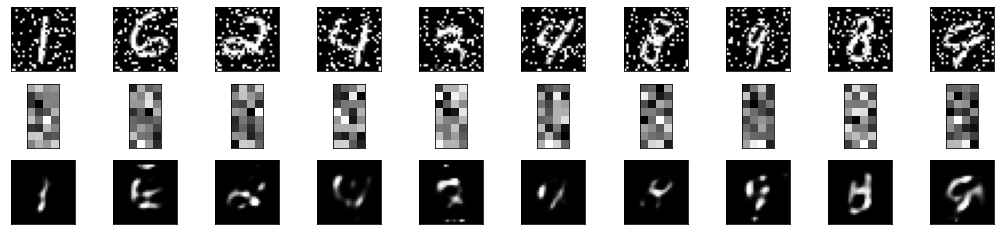

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import random

# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1
max_value = float(x_train.max())
x_train = x_train.astype("float32") / max_value
x_test = x_test.astype("float32") / max_value

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

def salt_and_pepper(pictures, freq=0.25, dist=0.5):
    for pic in pictures:
        index = list(range(len(pic)))
        random.shuffle(index)
        index = index[:int(freq * len(pic))]
        salt = index[:int(dist * len(index))]
        pepper = index[int(dist * len(index)):]

        for i in salt:
            pic[i] = 1.0
        
        for i in pepper:
            pic[i] = 0.0

salt_and_pepper(x_test)

# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()

# Encoder layer
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation="relu")
)

# Decoder layer
autoencoder.add(
    Dense(input_dim, activation="sigmoid")
)

input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Friday's questions:



https://colab.research.google.com/github/RomainTHD/DAT405_Introduction_to_Data_Science_and_AI/blob/master/Assignment_6/Assignment_6.ipynb

https://colab.research.google.com/drive/12nI33ZQIH4xWbBP_TGvDGbWoiI-l-GyC?usp=sharing


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab83f1d1-4f39-4251-b899-1ad25d544179' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>